<a href="https://colab.research.google.com/github/alexdng10/BraintumorClassification/blob/main/BrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:00<00:00, 193MB/s]
100% 149M/149M [00:00<00:00, 161MB/s]


In [ ]:
def get_class_paths(path):
  classes = []
  class_path = []

  for label in os.listdir(path):
    label_path = os.path.join(path, label)
    if os.path.isdir(label_path):
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)
        classes.append(label)
        class_path.append(image_path)
  df = pd.DataFrame({
      'Class Path': class_path,
      'Class': classes
  })




  return df

In [ ]:
tr_df = get_class_paths('/content/Training')

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5707,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [ ]:
ts_df = get_class_paths('/content/Testing')

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1306,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0085.jpg,glioma


In [34]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x='Class')


NameError: name 'tr_df' is not defined

<Figure size 1500x700 with 0 Axes>

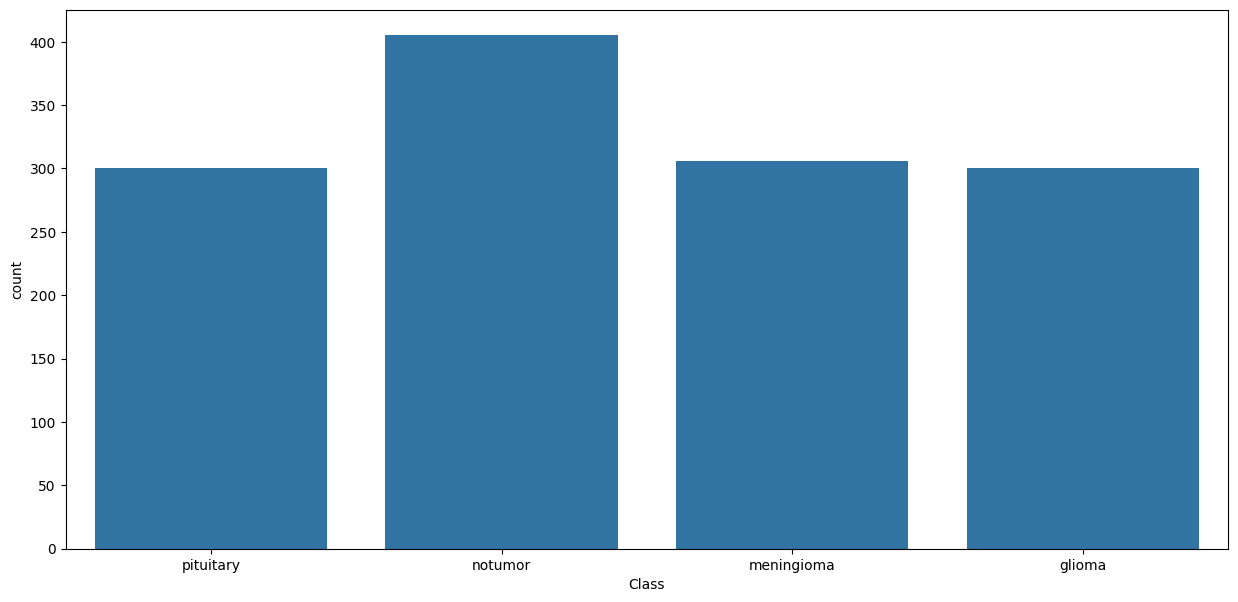

In [ ]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x='Class')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
829,/content/Testing/meningioma/Te-me_0183.jpg,meningioma
1221,/content/Testing/glioma/Te-gl_0205.jpg,glioma
856,/content/Testing/meningioma/Te-me_0065.jpg,meningioma
968,/content/Testing/meningioma/Te-me_0286.jpg,meningioma
1075,/content/Testing/glioma/Te-gl_0079.jpg,glioma
...,...,...
456,/content/Testing/notumor/Te-no_0058.jpg,notumor
1081,/content/Testing/glioma/Te-gl_0022.jpg,glioma
835,/content/Testing/meningioma/Te-me_0218.jpg,meningioma
1301,/content/Testing/glioma/Te-gl_0042.jpg,glioma


In [ ]:
ts_df

,Class Path,Class
1031,/content/Testing/glioma/Te-gl_0174.jpg,glioma
330,/content/Testing/notumor/Te-no_0251.jpg,notumor
766,/content/Testing/meningioma/Te-me_0207.jpg,meningioma
1188,/content/Testing/glioma/Te-gl_0204.jpg,glioma
813,/content/Testing/meningioma/Te-me_0234.jpg,meningioma
...,...,...
844,/content/Testing/meningioma/Te-me_0051.jpg,meningioma
474,/content/Testing/notumor/Te-no_0067.jpg,notumor
140,/content/Testing/pituitary/Te-pi_0025.jpg,pituitary
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary


In [ ]:
batch_size = 32

img_size = (299,299)

image_generator =  ImageDataGenerator(rescale=1./255,brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1./255)


In [ ]:
tr_gen = image_generator.flow_from_dataframe(
    tr_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
valid_gen = image_generator.flow_from_dataframe(
    valid_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)
ts_gen = ts_gen.flow_from_dataframe(
    ts_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


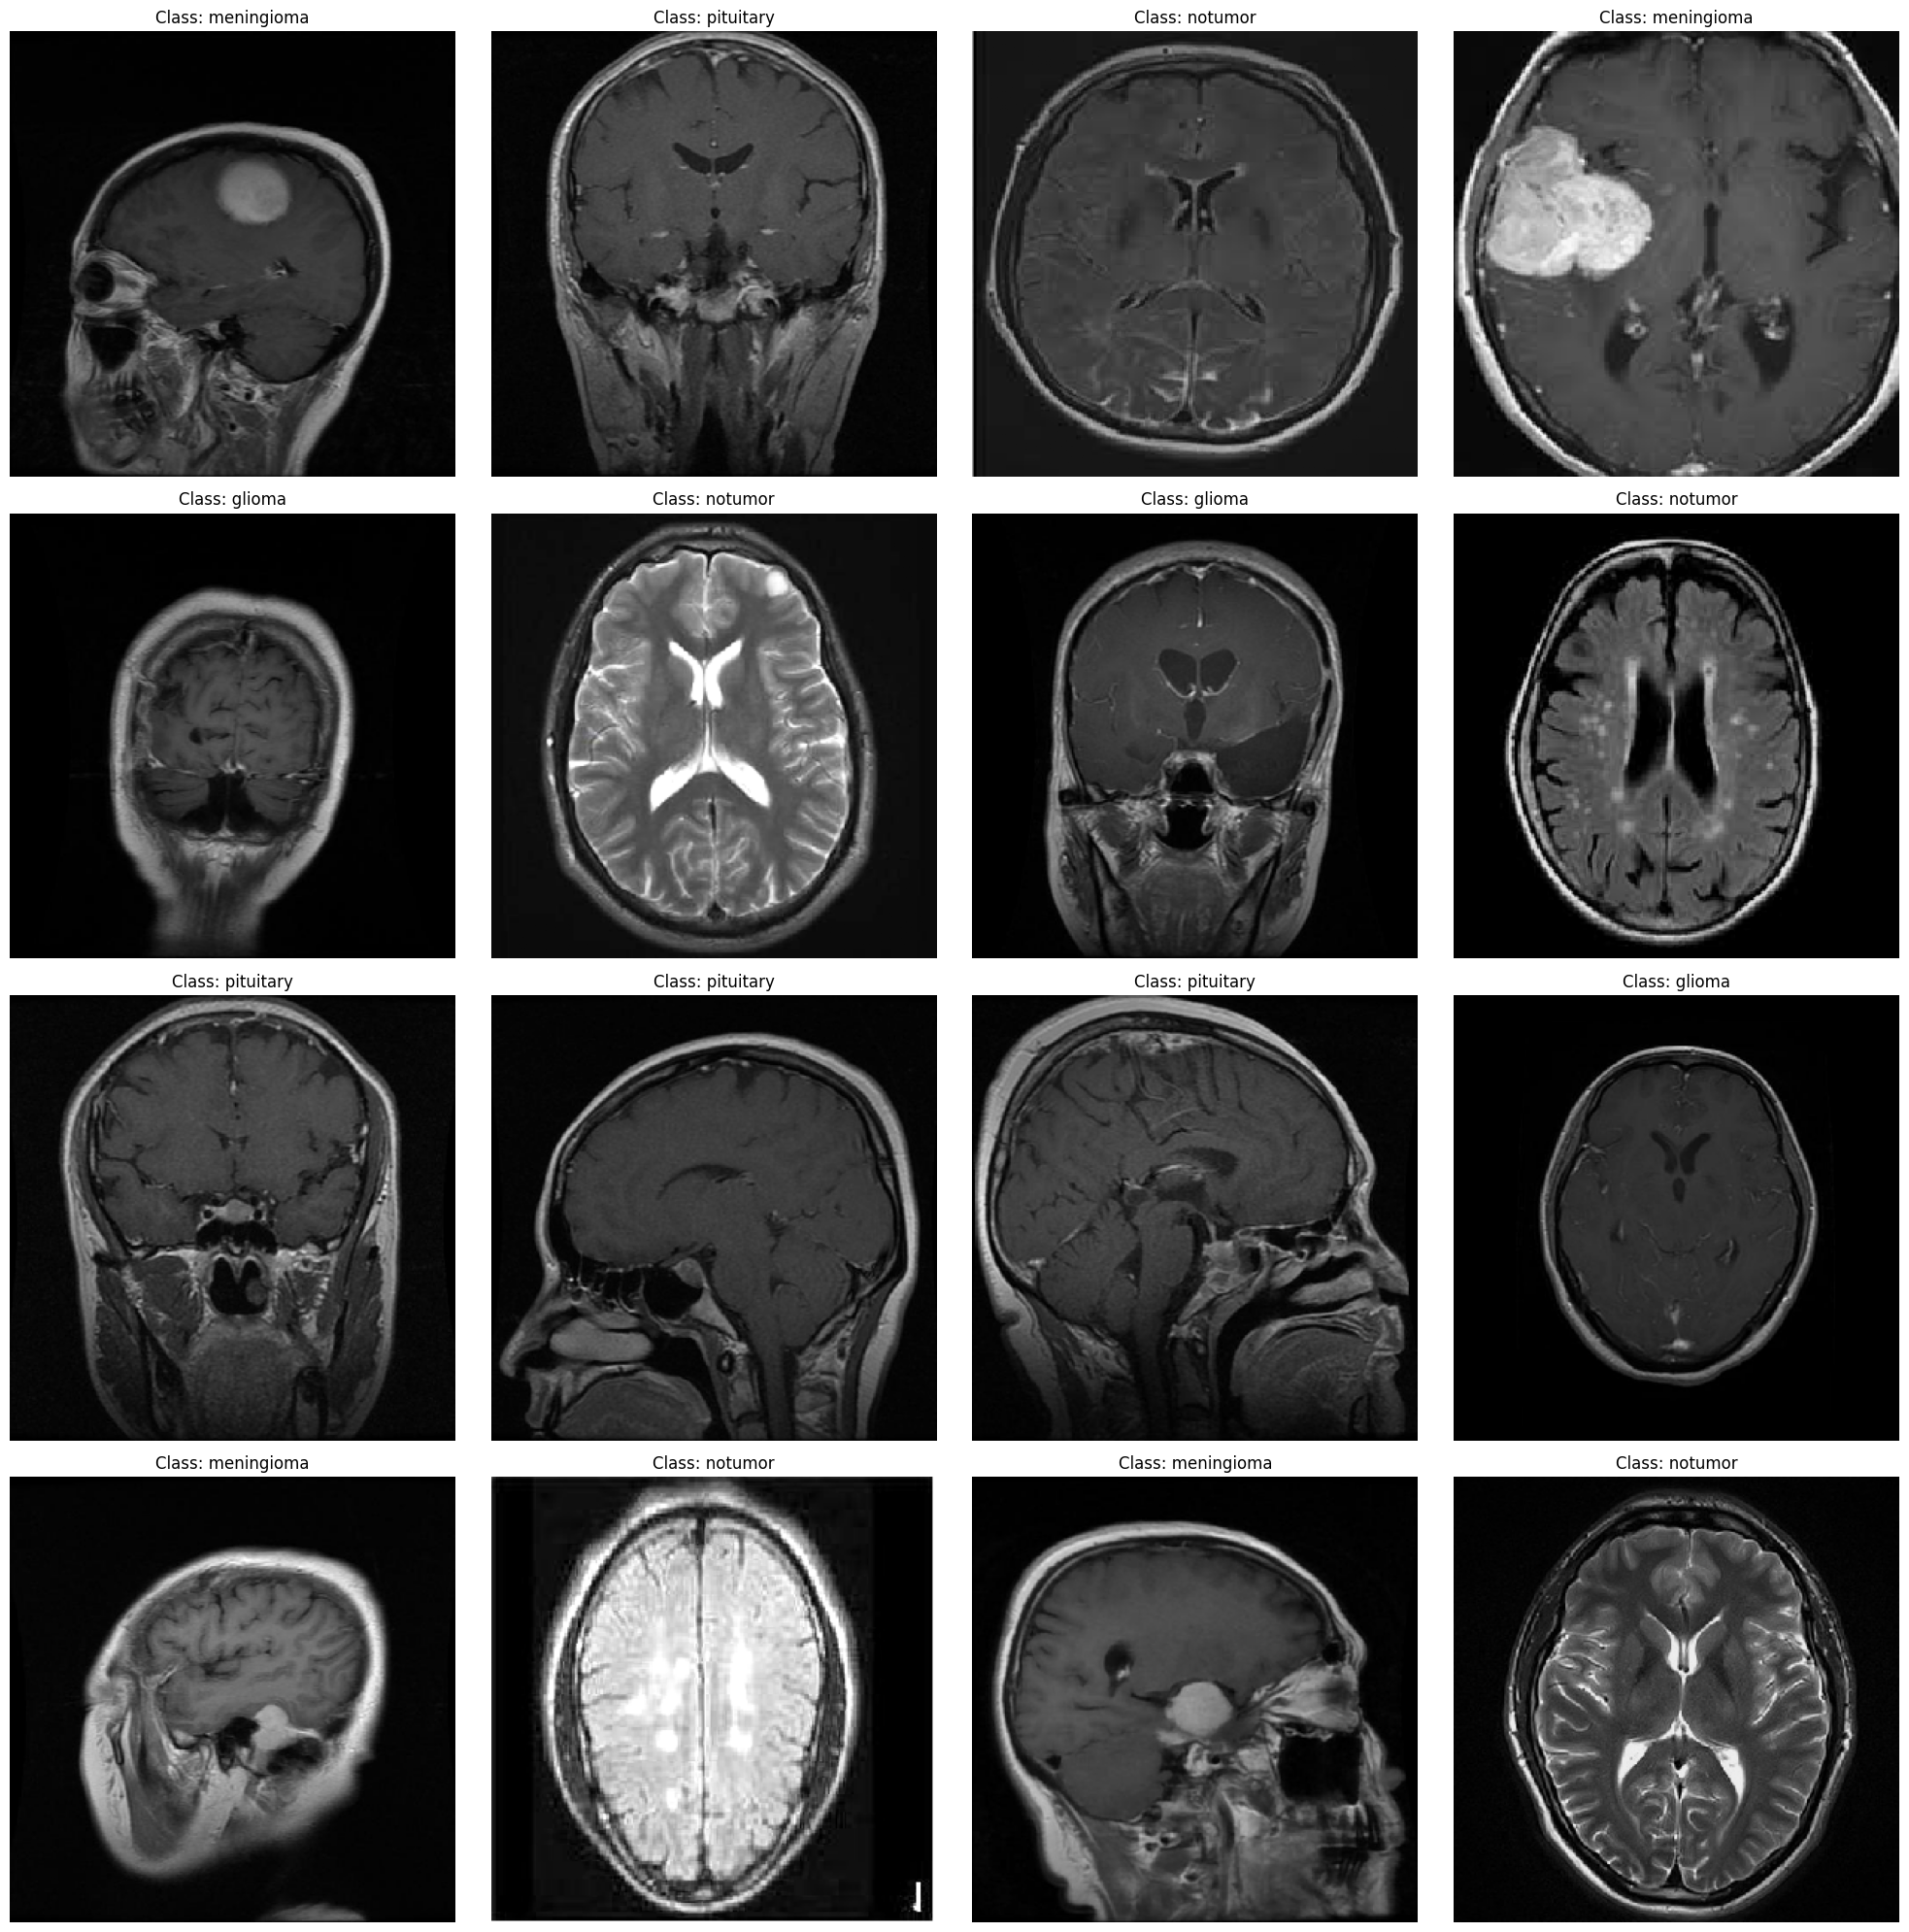

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
img_shape = [299,299,3]

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape,
    pooling='max'
)
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    Adamax(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy',
             Precision(),
             Recall()])


In [ ]:
hist = model.fit(
    tr_gen,
    epochs=5,
    validation_data=valid_gen
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 256s 983ms/step - accuracy: 0.8055 - loss: 0.6583 - precision: 0.8469 - recall: 0.7190 - val_accuracy: 0.9527 - val_loss: 0.1781 - val_precision: 0.9570 - val_recall: 0.9511
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 165s 731ms/step - accuracy: 0.9798 - loss: 0.0650 - precision: 0.9806 - recall: 0.9769 - val_accuracy: 0.9771 - val_loss: 0.0633 - val_precision: 0.9786 - val_recall: 0.9756
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 133s 739ms/step - accuracy: 0.9922 - loss: 0.0323 - precision: 0.9931 - recall: 0.9913 - val_accuracy: 0.9802 - val_loss: 0.0752 - val_precision: 0.9802 - val_recall: 0.9802
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 143s 744ms/step - accuracy: 0.9943 - loss: 0.0199 - precision: 0.9947 - recall: 0.9942 - val_accuracy: 0.9771 - val_loss: 0.1023 - val_precision: 0.9771 - val_recall: 0.9771
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 741ms/step - accuracy: 0.9939 - loss: 0.0180 - precision: 0.9939 - recall: 0.9930 - val_accuracy: 0.9924 - val_los

<Figure size 2000x1200 with 0 Axes>

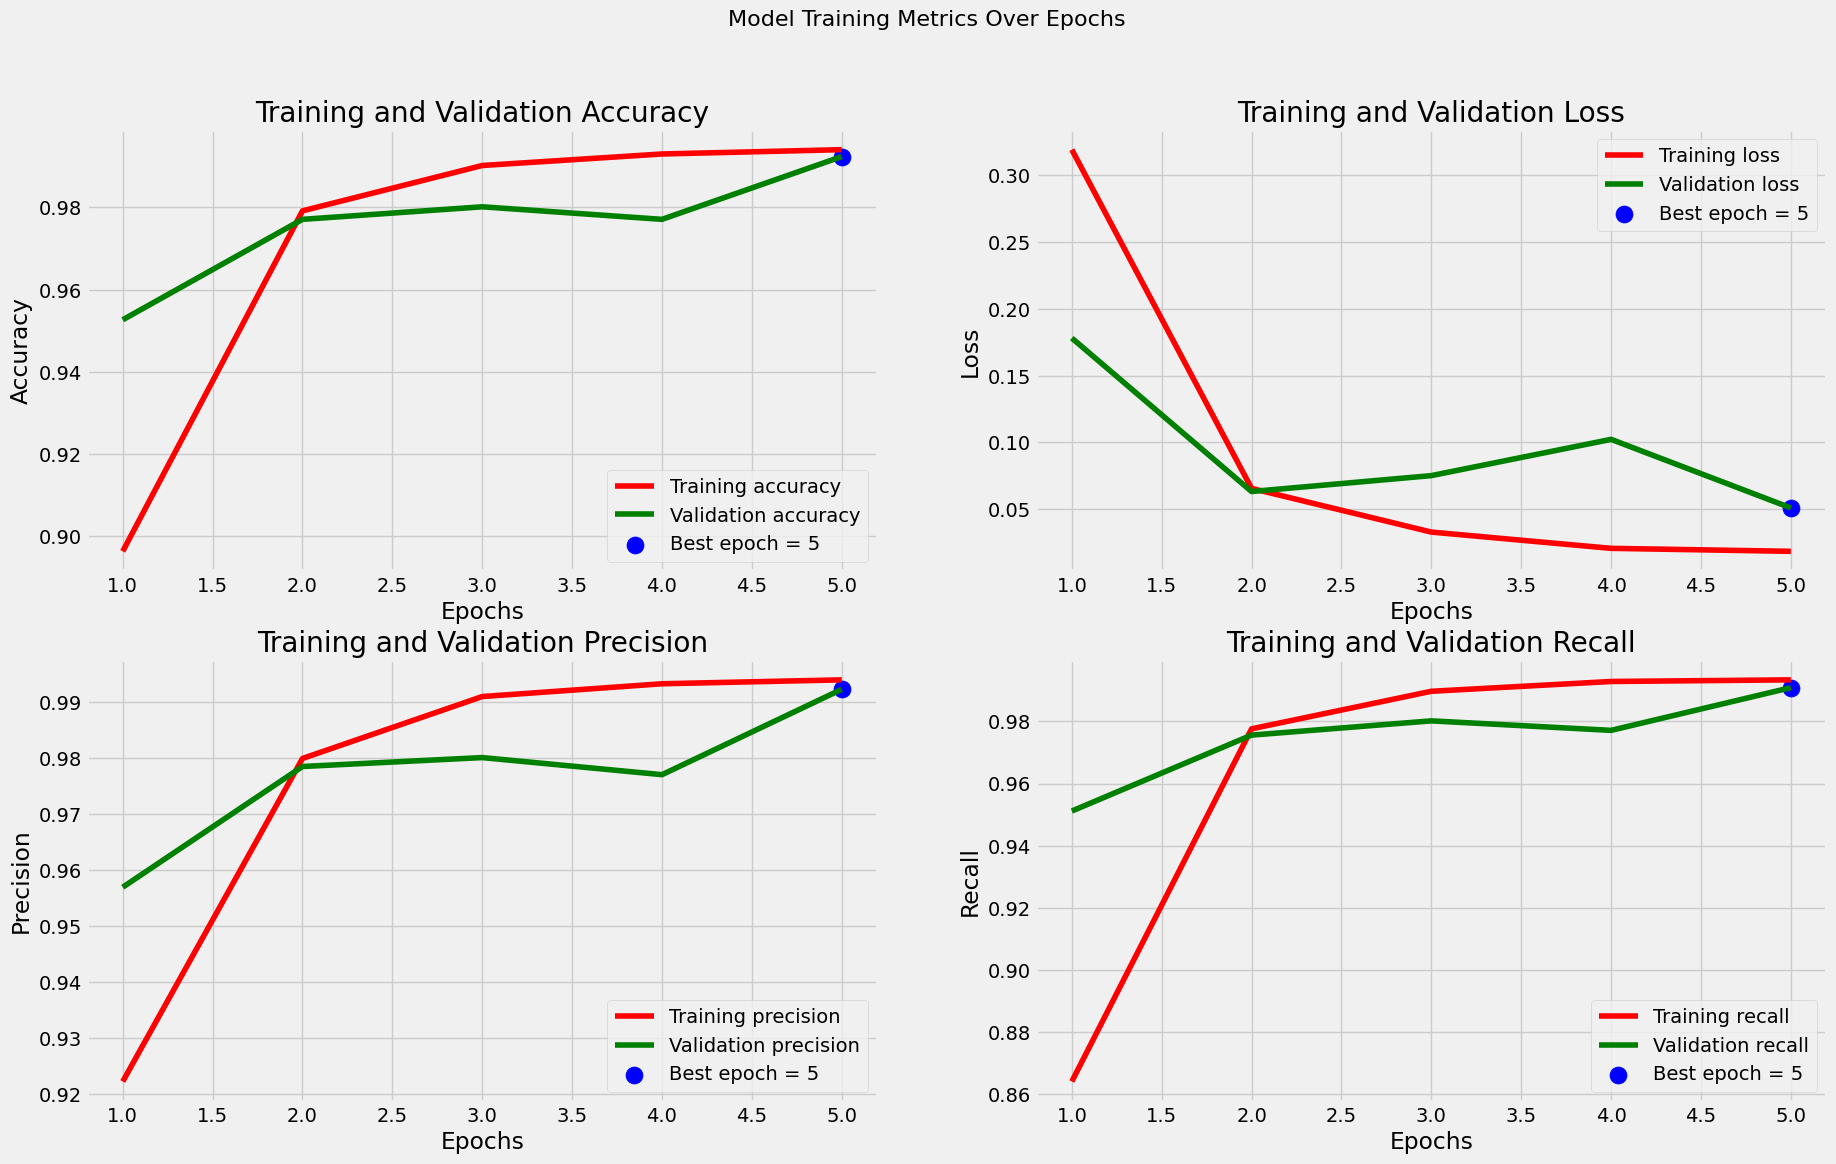

In [ ]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')
# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()


In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1] * 100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1] * 100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1] * 100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 42s 234ms/step - accuracy: 0.9987 - loss: 0.0057 - precision: 0.9987 - recall: 0.9987
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9932 - loss: 0.0382 - precision: 0.9932 - recall: 0.9932
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 1.0000 - loss: 1.5258e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9833 - loss: 0.0388 - precision: 0.9833 - recall: 0.9833
Train Accuracy: 99.84%
Train Loss: 0.0058


Validation Accuracy: 99.08%
Validation Loss: 0.0527


Test Accuracy: 98.48%
Test Loss: 0.0409


41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step


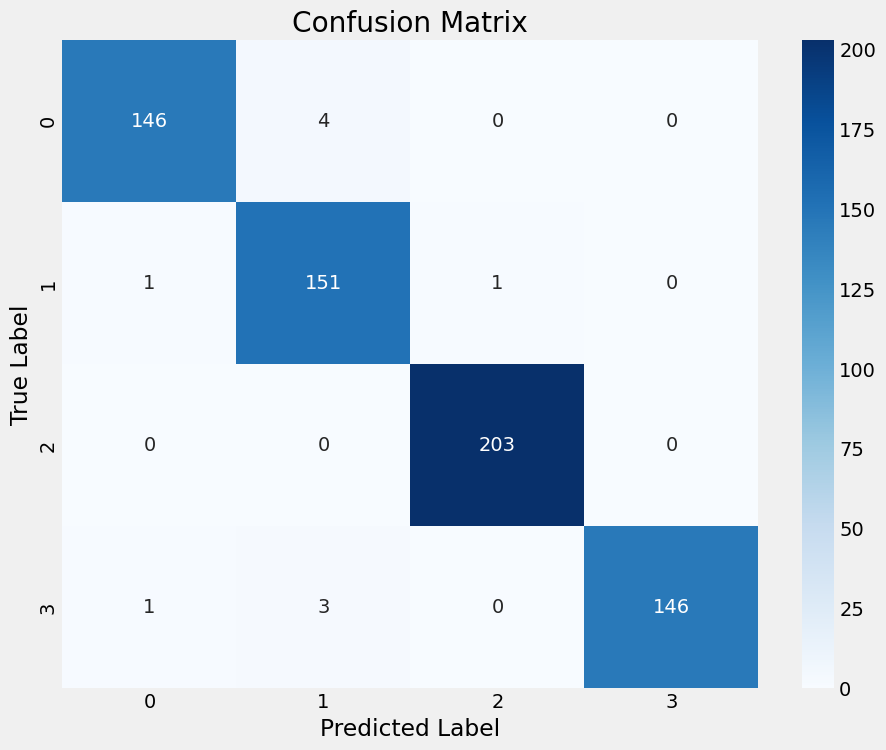

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.array(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


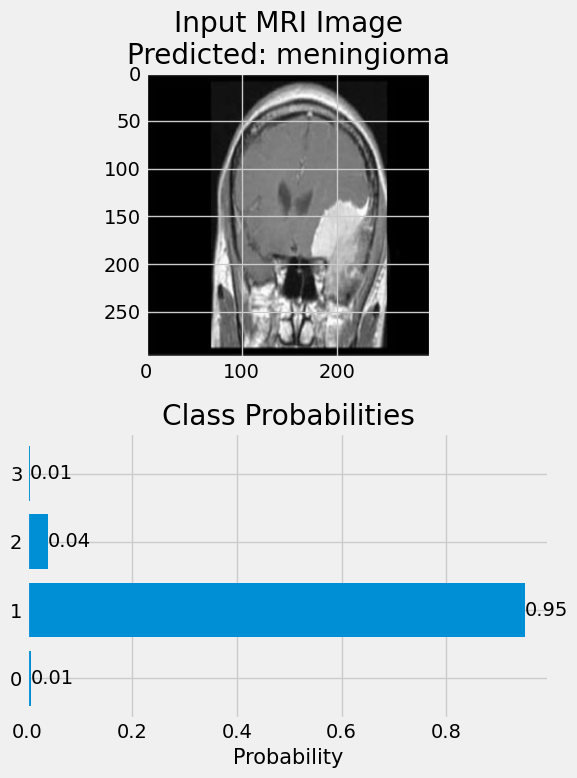


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


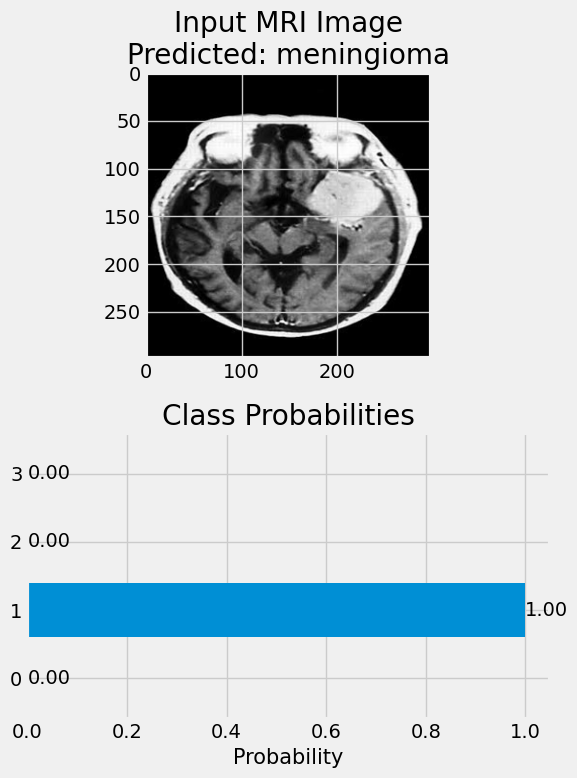


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


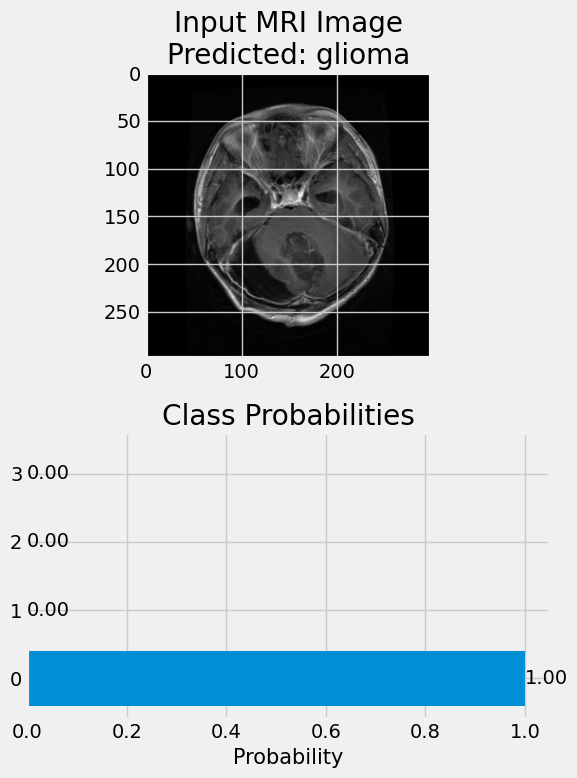


Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights('xception_model.weights.h5')

In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

Part 2: Streamlit

In [2]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [3]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [4]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [31]:
pip install streamlit tensorflow opencv-python plotly pillow google-generative-ai python-dotenv


ERROR: Could not find a version that satisfies the requirement google-generative-ai (from versions: none)
ERROR: No matching distribution found for google-generative-ai


In [24]:
def run_streamlit():
    os.system("streamlit run /content/app.py --server.port 8501")

In [35]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from dotenv import load_dotenv
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

load_dotenv()
output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)
def generate_explanation(img_path, model_prediction, confidence):
    prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan. The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma, meningioma, pituitary, or no tumor.

    The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

    The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

    In your response:
    - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted in light cyan, those are the regions where the model is focusing on.
    - Explain possible reasons why the model made the prediction it did.
    - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan' in your explanation.
    - Keep your explanation to 4 sentences max.
    """

    img = PIL.Image.open(img_path)  # Opens the MRI image from the provided path

    model = genai.GenerativeModel(model_name="gemini-1.5-flash")  # Creates an instance of the generative model
    response = model.generate_content([prompt, img])  # Generates an explanation based on the prompt and image

    return response.text  # Returns the generated explanation

def generate_saliency_map(model, img_array, class_index, img_size):
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    gradients = tape.gradient(target_class, img_tensor)
    gradients = tf.math.abs(gradients)
    gradients = tf.reduce_max(gradients, axis=-1)
    gradients = gradients.numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients = gradients * mask

    # Normalize only the brain area
    brain_gradients = gradients[mask]
    if brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
    gradients[mask] = brain_gradients

    # Apply a higher threshold
    threshold = np.percentile(gradients[mask], 80)
    gradients[gradients < threshold] = 0

    # Apply more aggressive smoothing
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Create a heatmap overlay with enhanced contrast
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Resize heatmap to match original image size
    heatmap = cv2.resize(heatmap, img_size)

    # Superimpose the heatmap on original image with increased opacity
    original_img = image.img_to_array(img)
    superimposed_img = heatmap * 0.7 + original_img * 0.3
    superimposed_img = superimposed_img.astype(np.uint8)

    img_path = os.path.join(output_dir, uploaded_file.name)
    with open(img_path, "wb") as f:
        f.write(uploaded_file.getbuffer())

    saliency_map_path = f'saliency_maps/{uploaded_file.name}'

    # Save the saliency map
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img

def load_xception_model(model_path):
    img_shape = (299, 299, 3)
    base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet",
                                                input_shape=img_shape, pooling='max')

    model = Sequential([
        base_model,
        Flatten(),
        Dropout(rate=0.3),
        Dense(128, activation='relu'),
        Dropout(rate=0.25),
        Dense(4, activation='softmax')
    ])

    model.build((None,) + img_shape)

    # Compile the model
    model.compile(Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy', Precision(), Recall()])

    model.load_weights(model_path)

    return model



st.title("Brain Tumor Classification")
st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
  selected_model = st.radio(
      "Select Model",
      ("Xception","CNN")
  )
  if selected_model == "Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  #gotta do CNN ---

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  st.write(f"Predicted Class: {result}")
  st.write("Predictions:")
  for label, prob in zip(labels, prediction[0]):
      st.write(f"{label}: {prob:.4f}")

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
      st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
  with col2:
      st.image(saliency_map, caption='Saliency Map', use_container_width=True)

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 10px;">
          <div style="display: flex; justify-content: space-between; align-items: center;">
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                      {result}
                  </p>
              </div>
              <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
              <div style="flex: 1; text-align: center;">
                  <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                  <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                      {prediction[0][class_index]:.4%}
                  </p>
              </div>
          </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange="reversed")
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
      fig.add_annotation(
          x=prob,
          y=i,
          text=f'{prob:.4f}',
          showarrow=False,
          xanchor='left',
          xshift=5
      )

  # Display the Plotly chart
  st.plotly_chart(fig)

  st.write("## Explanation")
  st.write(explanation)




Overwriting app.py


In [36]:
thread = Thread(target=run_streamlit)
thread.start()

In [37]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)


Public URL: NgrokTunnel: "https://27cf-34-80-83-160.ngrok-free.app" -> "http://localhost:8501"


In [28]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
    print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
    ngrok.disconnect(tunnel.public_url)


Closing tunnel: https://dbf2-34-80-83-160.ngrok-free.app -> http://localhost:8501
